In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 5 < pT < 6

Y_OS = [668.0, 713.0, 708.0, 719.0, 689.0, 631.0, 704.0, 672.0, 649.0, 651.0, 582.0, 
        616.0, 618.0, 605.0, 604.0, 569.0, 600.0, 544.0, 532.0, 514.0, 537.0, 480.0, 
        478.0, 442.0, 491.0, 476.0, 457.0, 441.0, 433.0, 448.0, 407.0, 389.0, 416.0, 
        437.0, 436.0, 464.0, 425.0, 434.0, 481.0, 577.0, 707.0, 864.0, 1317.0, 1799.0, 
        2423.0, 2712.0, 2484.0, 1884.0, 1167.0, 667.0, 478.0, 339.0, 312.0, 249.0, 
        228.0, 213.0, 206.0, 240.0, 222.0, 224.0, 261.0, 255.0, 285.0, 261.0, 247.0,
        184.0, 212.0, 167.0, 189.0, 179.0, 164.0, 152.0, 160.0, 151.0, 131.0, 136.0, 
        150.0, 147.0, 161.0, 135.0, 126.0, 139.0, 143.0, 135.0, 123.0, 109.0, 91.0, 
        120.0, 104.0, 111.0, 113.0, 125.0, 105.0, 99.0, 106.0, 101.0, 104.0, 85.0, 
        102.0, 98.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [169.0, 144.0, 167.0, 147.0, 151.0, 149.0, 142.0, 142.0, 149.0, 140.0, 133.0, 145.0, 
        148.0, 139.0, 136.0, 120.0, 124.0, 141.0, 118.0, 134.0, 115.0, 149.0, 132.0, 123.0, 
        127.0, 128.0, 117.0, 110.0, 127.0, 117.0, 126.0, 114.0, 105.0, 113.0, 115.0, 110.0, 
        131.0, 122.0, 105.0, 127.0, 107.0, 104.0, 109.0, 108.0, 124.0, 121.0, 126.0, 110.0, 
        113.0, 94.0, 104.0, 112.0, 127.0, 113.0, 131.0, 82.0, 111.0, 112.0, 142.0, 111.0, 
        127.0, 121.0, 104.0, 107.0, 108.0, 90.0, 104.0, 122.0, 109.0, 107.0, 106.0, 85.0, 
        93.0, 88.0, 91.0, 109.0, 90.0, 80.0, 76.0, 83.0, 67.0, 70.0, 71.0, 64.0, 80.0, 74.0, 
        56.0, 67.0, 64.0, 58.0, 63.0, 52.0, 58.0, 58.0, 61.0, 63.0, 48.0, 58.0, 42.0, 43.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [6.0, 5.0, 6.0, 5.0, 9.0, 6.0, 11.0, 7.0, 14.0, 6.0, 7.0, 9.0, 12.0, 14.0, 18.0, 
          20.0, 17.0, 26.0, 30.0, 27.0, 29.0, 38.0, 39.0, 34.0, 50.0, 49.0, 59.0, 59.0, 
          83.0, 88.0, 99.0, 110.0, 142.0, 156.0, 193.0, 256.0, 318.0, 397.0, 562.0, 713.0, 
          1052.0, 1574.0, 2516.0, 4114.0, 6493.0, 8377.0, 7892.0, 5200.0, 2399.0, 898.0, 
          336.0, 169.0, 102.0, 47.0, 31.0, 18.0, 21.0, 12.0, 9.0, 10.0, 9.0, 7.0, 7.0, 4.0, 
          3.0, 6.0, 5.0, 2.0, 0.0, 3.0, 2.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 3.0, 1.0, 1.0, 
          0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 
          0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [2.0, 3.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 3.0, 1.0, 7.0, 2.0, 0.0, 3.0, 3.0, 
         5.0, 3.0, 2.0, 4.0, 7.0, 3.0, 7.0, 4.0, 3.0, 3.0, 7.0, 9.0, 10.0, 9.0, 8.0, 9.0, 15.0, 
         13.0, 15.0, 20.0, 25.0, 21.0, 21.0, 20.0, 21.0, 27.0, 34.0, 30.0, 50.0, 48.0, 49.0, 
         62.0, 86.0, 101.0, 115.0, 152.0, 183.0, 243.0, 262.0, 417.0, 584.0, 841.0, 1336.0, 
         1961.0, 2991.0, 3652.0, 3387.0, 2311.0, 1151.0, 471.0, 180.0, 90.0, 54.0, 23.0, 17.0, 
         17.0, 10.0, 14.0, 6.0, 2.0, 2.0, 3.0, 3.0, 0.0, 4.0, 1.0, 2.0, 1.0, 3.0, 0.0, 1.0, 1.0, 
         0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [8.0, 8.0, 8.0, 7.0, 9.0, 6.0, 11.0, 9.0, 16.0, 8.0, 10.0, 10.0, 19.0, 16.0, 18.0, 23.0, 20.0, 31.0, 
        33.0, 29.0, 33.0, 45.0, 42.0, 41.0, 54.0, 52.0, 62.0, 66.0, 92.0, 98.0, 108.0, 118.0, 151.0, 171.0, 
        206.0, 271.0, 338.0, 422.0, 583.0, 734.0, 1072.0, 1595.0, 2543.0, 4148.0, 6523.0, 8427.0, 7940.0, 
        5249.0, 2461.0, 984.0, 437.0, 284.0, 254.0, 230.0, 274.0, 280.0, 438.0, 596.0, 850.0, 1346.0, 1970.0, 
        2998.0, 3659.0, 3391.0, 2314.0, 1157.0, 476.0, 182.0, 90.0, 57.0, 25.0, 20.0, 19.0, 11.0, 14.0, 6.0, 
        2.0, 4.0, 6.0, 4.0, 1.0, 4.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 0.0, 2.0, 1.0, 
        0.0, 1.0, 1.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 66350.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, p1L1, p2L1, p3L1, alphaR1, p1R1, p2R1, p3R1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, p1L2, p2L2, p3L2, alphaR2, p1R2, p2R2, p3R2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = NA60
func_Psi = NA60
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

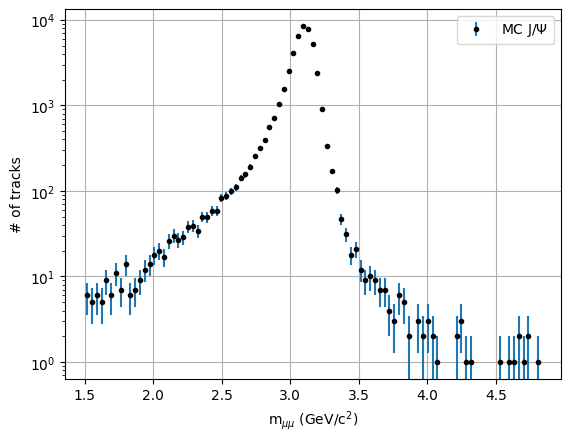

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([np.max(y_data), 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 1, 1, 1, 2.233482641523906, 1, 1, 1])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [8572.539207032769, 3.1023965121852766, 0.059840214581325255, -0.7951022837280591, 0.19778781591346872, 1.1839963880296107, 0.028648801401398315, 1.975006590116771, 0.1300013799207012, 1.2682814299531675, 0.023598477351889066]
pcov: 
 [[ 2.27765773e+03  5.40298037e-03 -1.43817673e-02  2.21469614e-01
   3.17199738e-02 -1.11280882e-01 -1.62293632e-02 -9.52332330e-01
  -5.56302593e-02  1.90542035e-01  1.33924077e-02]
 [ 5.40298037e-03  2.14798271e-07 -1.46067756e-07  2.20225948e-05
  -1.80150020e-06  4.41981830e-06  3.23228133e-07 -4.29205263e-06
   4.71148813e-09 -3.25498955e-07 -7.29803771e-08]
 [-1.43817673e-02 -1.46067756e-07  2.35909407e-07 -1.94478690e-05
   1.13753134e-06 -2.58291545e-06 -1.27129338e-07  1.81286226e-05
   1.06805722e-06 -3.87713702e-06 -2.94637522e-07]
 [ 2.21469614e-01  2.20225948e-05 -1.94478690e-05  6.72965010e-03
  -9.07964280e-04  2.60948540e-03  2.58105841e-04 -1.12062828e-03
  -4.94032936e-05  1.65120595e-04  9.95895499e-06]
 [ 3.17199738e-02 -1.8015

fit error : 47.724999418897816


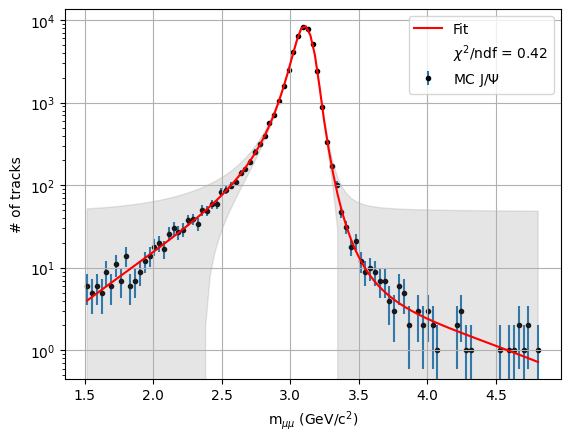

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

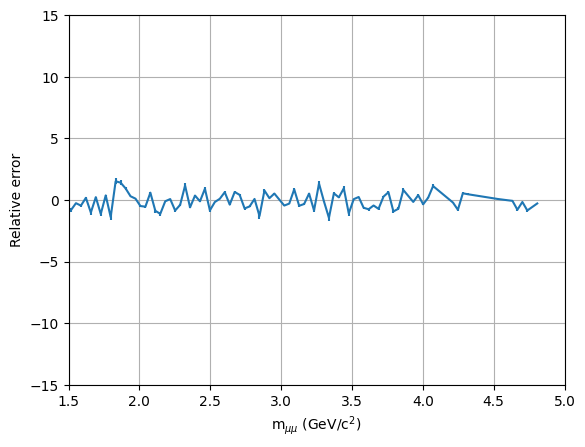

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

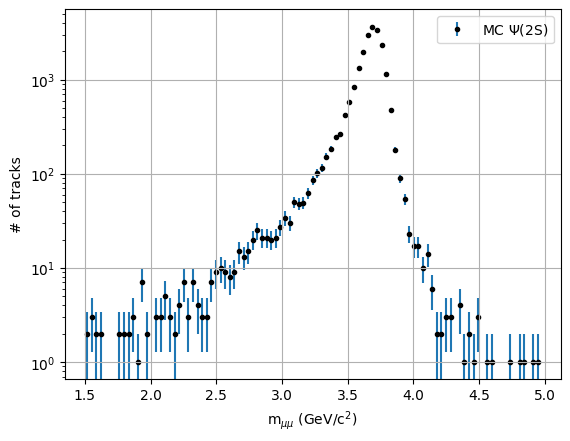

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([np.max(y_data), 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 1, 1, 1, 2.283717751711943, 1, 1, 1])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [3687.7341855355276, 3.69446815921182, 0.06501825270331178, -0.9028400167052006, 0.232809818844809, 1.083772374495931, 0.017193988757950026, 2.264331736095977, 0.17232671399978775, 1.0601177460562663, -0.006429122895858938]
pcov: 
 [[ 1.11032938e+03  5.48921107e-03 -1.33420838e-02 -1.99739785e-01
   7.28742046e-02 -1.71416970e-01 -1.77529610e-02 -2.99379023e-01
   2.33166755e-03 -2.46182751e-02 -1.02586937e-03]
 [ 5.48921107e-03  9.86112112e-07 -6.11313573e-07  7.68354426e-05
  -6.12754394e-06  1.26971212e-05  9.19228745e-07 -8.55792105e-06
   9.24531046e-07 -3.05761460e-06 -2.21834435e-07]
 [-1.33420838e-02 -6.11313573e-07  6.62309363e-07 -5.23019234e-05
   3.13198895e-06 -6.30756813e-06 -3.78893276e-07  1.93215463e-05
  -1.02016842e-07  8.46555655e-07  1.46893922e-08]
 [-1.99739785e-01  7.68354426e-05 -5.23019234e-05  1.35106078e-02
  -1.81979053e-03  4.30558674e-03  4.03135222e-04 -1.15748280e-03
   4.94332539e-05 -1.72909877e-04 -1.08234300e-05]
 [ 7.28742046e-02 -6.1275439

fit error : 33.322406193256306


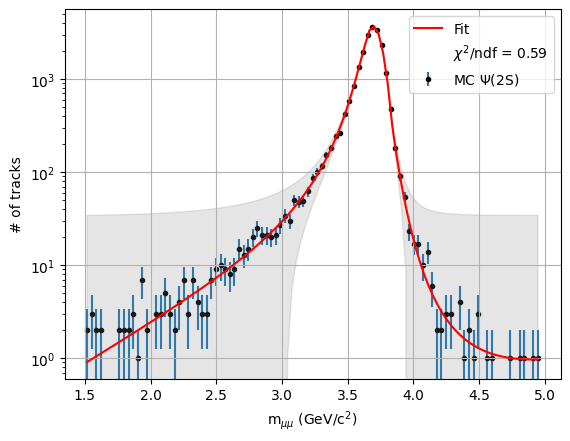

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

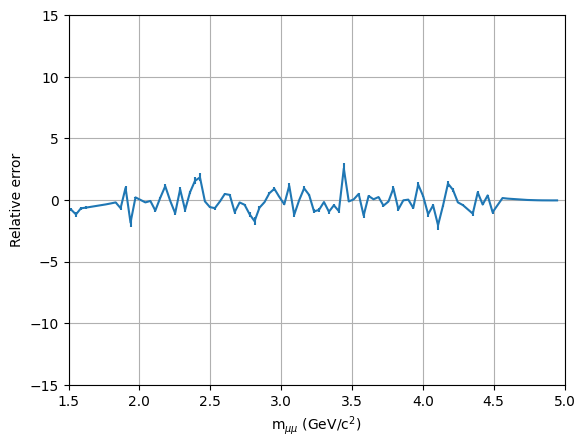

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

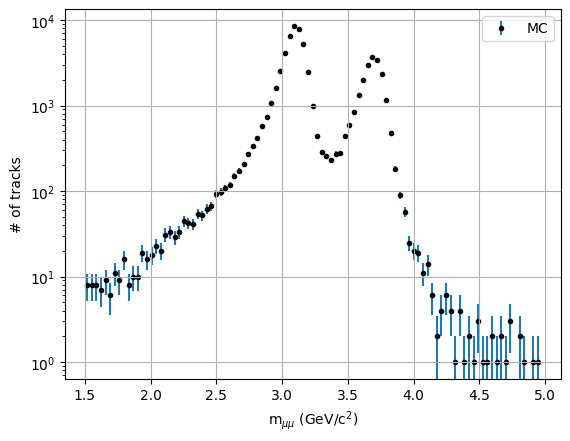

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [8562.159862178392, 3.102407289233371, 0.05994279571800561, 3690.203839349058, 3.694493714096238, 0.06488635997314782]
pcov: 
 [[ 2.86805860e+03  3.07611606e-03 -1.10461893e-02 -1.49943024e+01
  -4.86474415e-04  6.38111970e-04]
 [ 3.07611606e-03  1.18598250e-07 -1.99767140e-08  2.77729061e-05
   1.86791142e-09 -1.92301322e-09]
 [-1.10461893e-02 -1.99767140e-08  8.05289200e-08  2.74327076e-04
   8.24828863e-09 -1.20531952e-08]
 [-1.49943024e+01  2.77729061e-05  2.74327076e-04  1.11099367e+03
   4.07754836e-03 -1.08438642e-02]
 [-4.86474415e-04  1.86791142e-09  8.24828863e-09  4.07754836e-03
   3.12728502e-07 -8.37845036e-08]
 [ 6.38111970e-04 -1.92301322e-09 -1.20531952e-08 -1.08438642e-02
  -8.37845036e-08  2.08891788e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.08346604, -0.9111174 , -0.72209003, -0.17231418, -0.60414253,
        0.77313566, -0.70277487,  0.17362137, -1.38576023,  1.23267165,
        0.82845959,  1.22333064, -0.86124948,  0.19180988,  0.10609143,
       -0.

fit error : 63.07972946453902


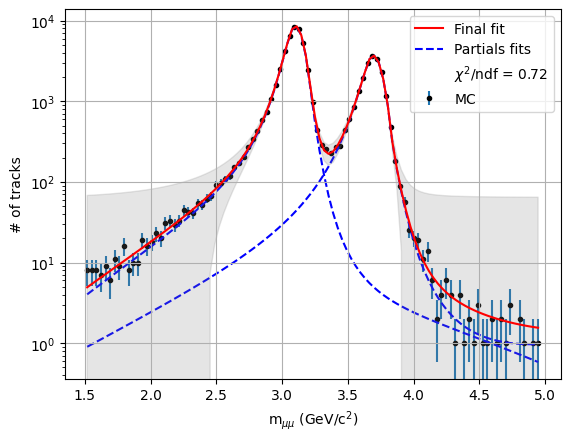

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_7126/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


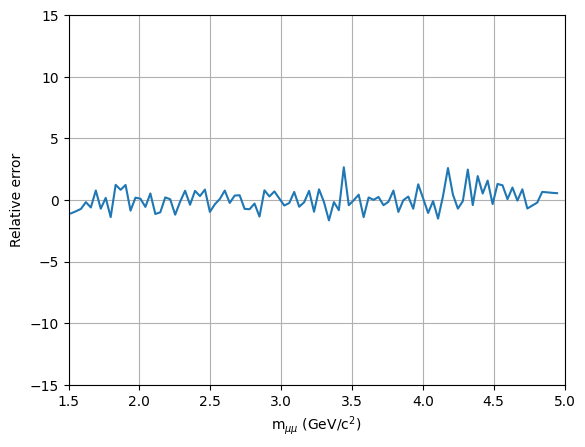

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

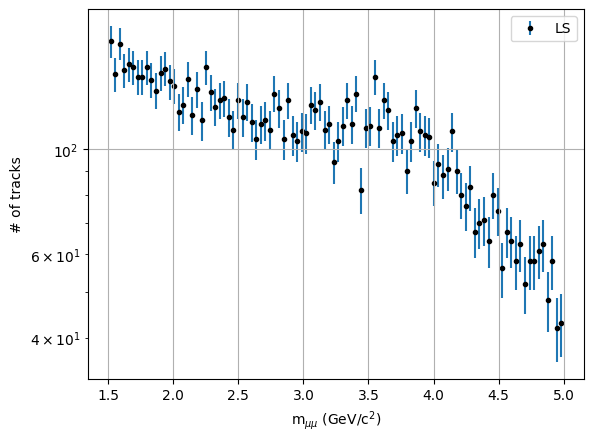

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [5.116800218038716, 4.786091764789183, 4.709840580113494, 4.624976174468824, 3.758924839683535]
pcov: 
 [[ 1.41877450e-03 -2.56205548e-04  1.84606612e-04  9.87474396e-05
   3.35993815e-04]
 [-2.56205548e-04  2.90456712e-04  5.59777450e-06 -2.97336603e-05
  -1.83563261e-05]
 [ 1.84606612e-04  5.59777450e-06  3.45236833e-04  2.38240170e-04
   1.27198697e-04]
 [ 9.87474396e-05 -2.97336603e-05  2.38240170e-04  3.12736664e-04
  -3.63246670e-04]
 [ 3.35993815e-04 -1.83563261e-05  1.27198697e-04 -3.63246670e-04
   4.66731003e-03]]
residual: 
 {'nfev': 17, 'fvec': array([-0.31874771,  1.43072847, -0.71699452,  0.62155886,  0.04538809,
       -0.01761252,  0.35282225,  0.15133404, -0.60865048, -0.04267576,
        0.39602471, -0.76587622, -1.1411097 , -0.54456606, -0.41539677,
        0.89815589,  0.41510217, -1.13689265,  0.77937461, -0.73300576,
        0.89901044, -2.06127081, -0.77425545, -0.05115769, -0.45974477,
       -0.59582075,  0.34657537,  0.98054512, -0.63349621,  0.2288468

fit error : 0.08387201407971691


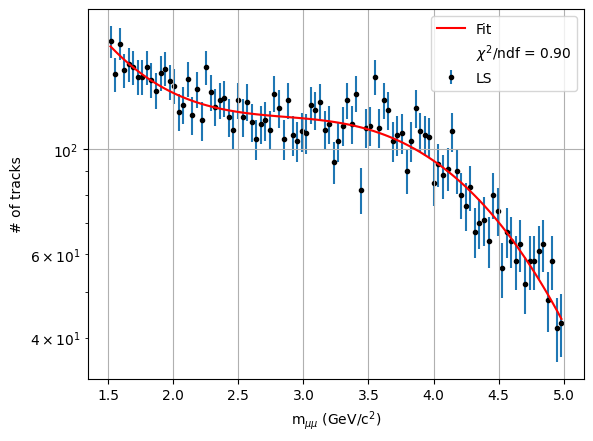

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

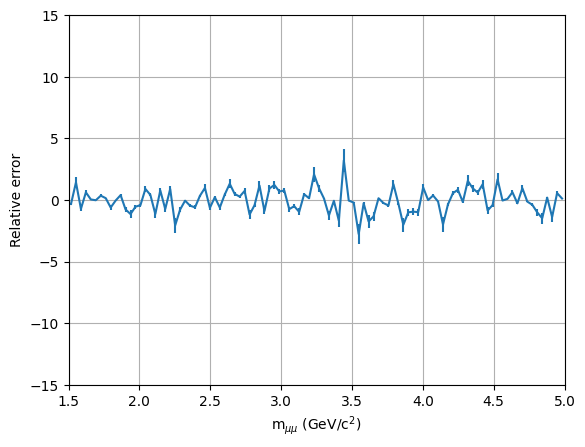

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

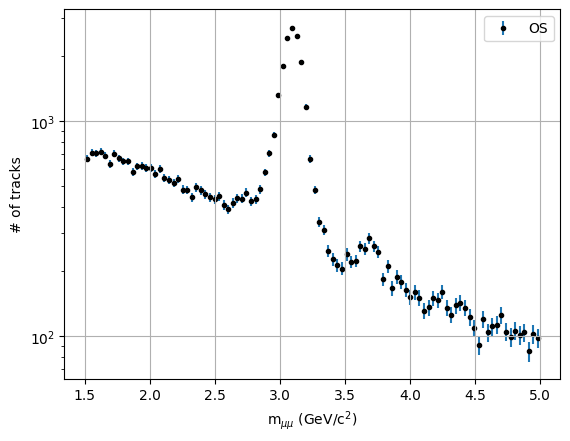

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
p1L1 = popt_JPsi[4]
p2L1 = popt_JPsi[5]
p3L1 = popt_JPsi[6]
alphaR1 = popt_JPsi[7]
p1R1 = popt_JPsi[8]
p2R1 = popt_JPsi[9]
p3R1 = popt_JPsi[10]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
p1L2 = popt_Psi[4]
p2L2 = popt_Psi[5]
p3L2 = popt_Psi[6]
alphaR2 = popt_Psi[7]
p1R2 = popt_Psi[8]
p2R2 = popt_Psi[9]
p3R2 = popt_Psi[10]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2, y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [2573.8714109397974, 3.0997883588740645, 0.06582423603945776, 89.08136700274791, 3.6948909006025668, 0.06351669630069666, 6.589457231707089, 6.025091282895347, 5.374093180546034, 5.16957138977868, 4.5020867072391795]
pcov: 
 [[ 2.01946189e+03  7.22540513e-03 -3.28147435e-02  5.67676169e-01
  -6.26021442e-03  1.21242192e-02 -1.74551742e-02  1.27976759e-02
  -2.65831506e-02 -1.81379133e-02 -1.48739673e-02]
 [ 7.22540513e-03  1.39479039e-06 -3.71342906e-07 -2.03185245e-04
   4.81768378e-07 -9.62814275e-07 -2.59135688e-07  2.72582048e-06
   4.05262562e-06  2.00816079e-06  2.86183221e-06]
 [-3.28147435e-02 -3.71342906e-07  1.56515913e-06  1.82024077e-03
  -1.65064698e-06  3.77885340e-06 -3.52650058e-06 -8.09368565e-06
  -2.04432343e-05 -1.23953297e-05 -9.82130052e-06]
 [ 5.67676169e-01 -2.03185245e-04  1.82024077e-03  2.49570624e+02
   2.09629370e-02 -1.08109771e-01 -2.68885856e-02 -1.77763116e-02
  -9.94662413e-02 -8.47336193e-02  1.92670408e-02]
 [-6.26021442e-03  4.81768378e-07 -

fit error : 47.63444530787118


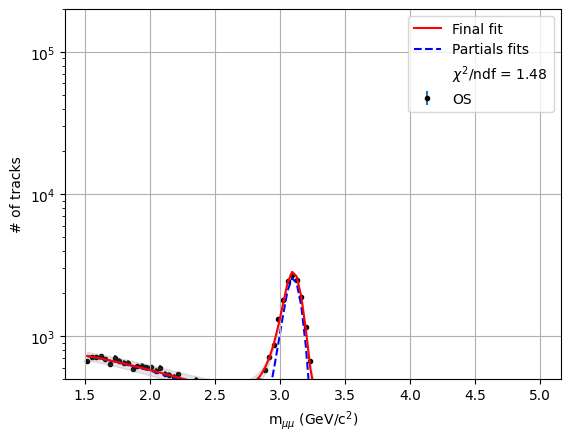

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(500, 200000)
plt.grid(True)

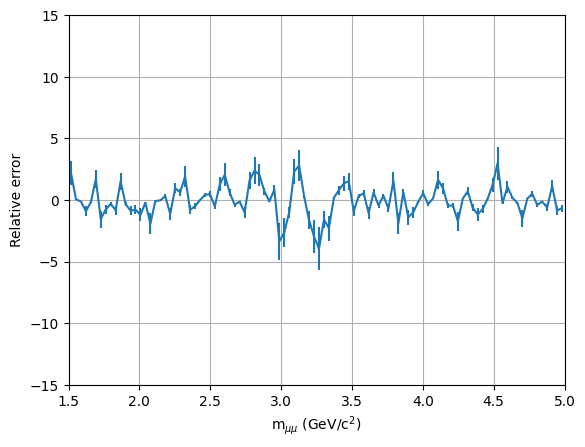

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dNA60(pcov, x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    
    def dNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) - (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(-2*mu + 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2,
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(-p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) + (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(-2*mu + 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])  

    def dNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
            return np.piecewise(x, 
                                [(x - mu)/sig < alphaL, 
                                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                                 (x - mu)/sig > alphaR],
                                [lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/sig**2), 
                                 lambda x: np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                            [(x - mu)/sig < alphaL, 
                             ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                             (x - mu)/sig > alphaR],
                            [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*np.log(alphaL - (-mu + x)/sig)/(2*sig*np.sqrt(alphaL - (-mu + x)/sig)) + (p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                             lambda x: -0.5*N*(2*mu - 2*x)*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**2, 
                             lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*np.log(-alphaR + (-mu + x)/sig)/(2*sig*np.sqrt(-alphaR + (-mu + x)/sig)) - (p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) - 0.5*(2*mu - 2*x)/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    def dNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
        return np.piecewise(x, 
                [(x - mu)/sig < alphaL, 
                 ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                 (x - mu)/sig > alphaR],
                [lambda x: N*(1.0*p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))*(-mu + x)**2*(-p3L*(-mu + x)*np.log(alphaL - (-mu + x)/sig)/(2*sig**2*np.sqrt(alphaL - (-mu + x)/sig)) + (-mu + x)*(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig))/(sig**2*(alphaL - (-mu + x)/sig)))/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1L*(alphaL - (-mu + x)/sig)**(p2L - p3L*np.sqrt(alphaL - (-mu + x)/sig)) + 1)**2)),
                 lambda x: 1.0*N*(-mu + x)**2*np.exp(-0.5*(-mu + x)**2/sig**2)/sig**3,
                 lambda x: N*(1.0*p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))*(-mu + x)**2*(p3R*(-mu + x)*np.log(-alphaR + (-mu + x)/sig)/(2*sig**2*np.sqrt(-alphaR + (-mu + x)/sig)) - (-mu + x)*(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig))/(sig**2*(-alphaR + (-mu + x)/sig)))/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**3) + 1.0*(-mu + x)**2/(sig**3*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))*np.exp(-0.5*(-mu + x)**2/(sig**2*(p1R*(-alphaR + (-mu + x)/sig)**(p2R - p3R*np.sqrt(-alphaR + (-mu + x)/sig)) + 1)**2))])

    
    def IdNA60dx(x, *args):
        return quad(dNA60dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dN(x, *args):
        return quad(dNA60dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dmu(x, *args):
        return quad(dNA60dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdNA60dsig(x, *args):
        return quad(dNA60dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdNA60dx(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * (((stop - start)/bins)/2)**2 \
                   + IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[0, 0] \
                   + IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[1, 1] \
                   + IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R)**2 * pcov[2, 2] \
                   + 2 * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdNA60dmu(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdNA60dsig(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * IdNA60dN(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R) * np.sqrt(np.abs(pcov[2, 1])))


N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dNA60(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  14871.749619015387  +/-  399.92563857055865 (stat.)
